In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
ticker = "GOOG"
data = yf.download(ticker, start="2023-01-01", end="2024-12-01")
display(data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-01-03,89.378845,89.699997,91.550003,89.019997,89.830002,20738500
2023-01-04,88.392403,88.709999,91.239998,87.800003,91.010002,27046500
2023-01-05,86.459343,86.769997,88.209999,86.559998,88.070000,23136100
2023-01-06,87.844376,88.160004,88.470001,85.570000,87.360001,26612600
2023-01-09,88.482079,88.800003,90.830002,88.580002,89.195000,22996700
...,...,...,...,...,...,...
2024-11-22,166.381256,166.570007,168.264999,165.710007,167.160004,24497000
2024-11-25,169.237991,169.429993,170.460007,167.399994,167.990005,21395700


In [4]:
prices = data['Close'].values

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
price_scaled = scaler.fit_transform(prices.reshape(-1,1))

In [6]:
def create_sequences(data, n_steps):
 """
 Creates sequences of `n_steps` length using NumPy's slicing.
 """
 data = np.array(data) # Ensure data is a NumPy array
 num_samples = len(data) - n_steps
 X = np.array([data[i:i + n_steps] for i in range(num_samples)])
 y = data[n_steps:]
 return X, y

n_steps = 50 # Number of time steps in each input sequence
X, y = create_sequences(price_scaled, n_steps)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential(
    [
        SimpleRNN(50, activation='tanh', input_shape=(n_steps,1)),
        Dense(units=1)  # Output layer with no activation function for regression
    ]
)

c:\Users\sayyed\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mse')

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0197 - val_loss: 0.0044
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010 - val_loss: 9.4732e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010 - val_loss: 9.0224e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9934e-04 - val_loss: 8.9993e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0592e-04 - val_loss: 9.0719e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5318e-04 - val_loss: 8.9649e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9998e-04 - val_loss: 8.8030e-04
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1308e-04 - val_loss: 8.9890e-04
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4792e-04 - val_loss: 8.9484e-04
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.2637e-04 - val_loss: 8.6826e-04
Epoch 12/20
9/9 ━━━━━

In [14]:
loss = model.evaluate(x_test, y_test)
print(loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
0.0012922232272103429


In [15]:
y_pred = model.predict(x_test)
y_pred_og = scaler.inverse_transform(y_pred)
y_test_og = scaler.inverse_transform(y_test.reshape(1,-1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


In [22]:
y_test_og[0]

array([179.58000183, 122.62999725, 178.46000671, 108.22000122,
       167.42999268, 157.46000671, 123.44000244, 137.8999939 ,
       131.69000244, 138.22000122, 171.41000366, 119.01000214,
       137.38999939, 188.19000244, 116.90000153, 138.72999573,
       156.        , 120.01000214, 101.90000153, 169.16000366,
       168.99000549, 143.53999329, 139.66000366, 126.62999725,
       135.99000549, 142.72000122, 140.28999329, 167.21000671,
       136.28999329, 156.13999939, 138.30000305, 178.02000427,
       165.38999939, 133.11000061, 166.57000732, 120.13999939,
       144.08000183, 172.44999695, 185.36999512, 169.42999268,
       170.28999329, 140.99000549, 116.87000275, 120.97000122,
       106.12000275, 137.3500061 , 178.        , 120.93000031,
       173.69000244, 160.27999878, 108.90000153, 143.83999634,
       140.92999268, 101.06999969, 108.19000244, 166.99000549,
       168.46000671, 127.91000366, 137.91999817, 125.69999695,
       183.3500061 , 165.57000732, 117.70999908, 129.66

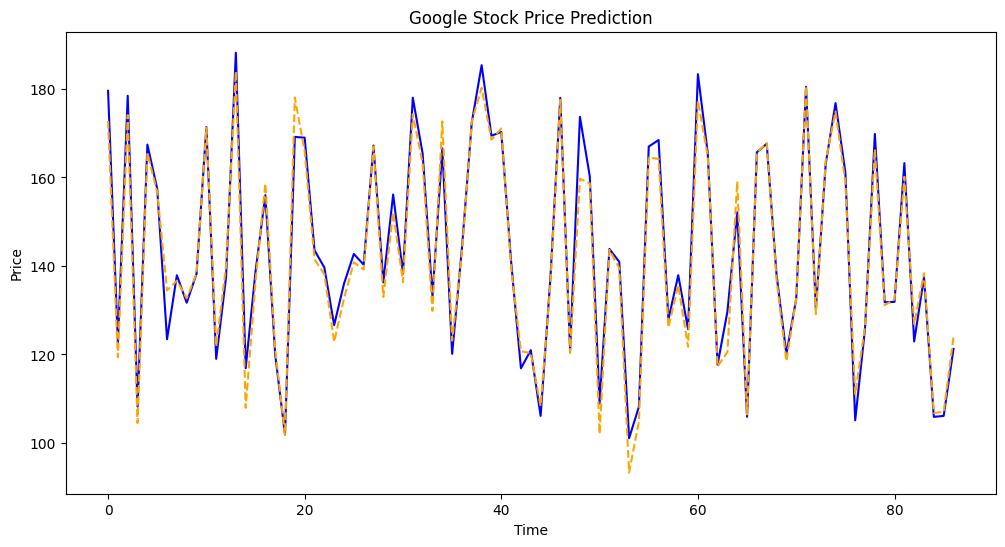

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test_og[0], label='True Prices', color='blue')
plt.plot(y_pred_og, label='Predicted Prices', color='orange', linestyle='dashed')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel("Price")
plt.show()